In [8]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_euler(theta):
    #input besaran fisis (SI)
    g = 9.81
    x_awal = 0
    y_awal = 0
    x_akhir = 30
    y_akhir = 10
    
    #tebakan nilai kecepatan awal
    v_awal_1 = 20
    v_awal_2 = 30
    
    #input besaran perhitungan
    x = np.linspace(x_awal, x_akhir, 1000)
    
    y1 = np.empty([len(x)], dtype = 'float')
    v1 = np.empty([len(x)], dtype = 'float')
    theta1 = np.empty([len(x)], dtype = 'float')
    y1[0] = y_awal
    v1[0] = v_awal_1
    theta1[0] = theta
    
    y2 = np.empty([len(x)], dtype = 'float')
    v2 = np.empty([len(x)], dtype = 'float')
    theta2 = np.empty([len(x)], dtype = 'float')
    y2[0] = y_awal
    v2[0] = v_awal_2
    theta2[0] = theta
    
    delta_x = (x_akhir - x_awal)/len(x)
    
    while abs(v2[0] - v1[0]) > 1e-5:
        for i in range(1,len(x)):
            y1[i] = y1[i-1] + np.tan(theta1[i-1])*delta_x
            v1[i] = v1[i-1] - (g/v1[i-1])*np.tan(theta1[i-1])*delta_x
            theta1[i] = theta1[i-1] - (g/(v1[i-1]**2))*delta_x
            
            y2[i] = y2[i-1] + np.tan(theta2[i-1])*delta_x
            v2[i] = v2[i-1] - (g/v2[i-1])*np.tan(theta2[i-1])*delta_x
            theta2[i] = theta2[i-1] - (g/(v2[i-1]**2))*delta_x
        
        v3 = v2[0] - ((y2[len(x)-1] - y_akhir)*(v2[0] - v1[0]))/(y2[len(x)-1] - y1[len(x)-1])
        v1[0] = v2[0]
        v2[0] = v3
        
    return v1[0], y1, v1

In [3]:
#Hasil Evaluasi Kecepatan untuk 0.4 <= theta <= 1.5

from IPython.display import display
import pandas as pd

theta_awal = np.linspace(0.4, 1.5, 12)
kecepatan_awal = []
for j in range(len(theta_awal)):
    kecepatan_awal.append(shooting_euler(theta_awal[j])[0])

hasil = {'Sudut Awal (rad)': theta_awal, 'Kecepatan Awal (m/s)': kecepatan_awal}
df = pd.DataFrame(hasil)
display(df)

,Sudut Awal (rad),Kecepatan Awal (m/s)
0,0.4,44.070110
1,0.5,29.944755
2,0.6,24.800991
3,0.7,22.215927
4,0.8,20.850301
5,0.9,20.256633
6,1.0,20.281908
7,1.1,20.932744
8,1.2,22.380633
9,1.3,25.117196


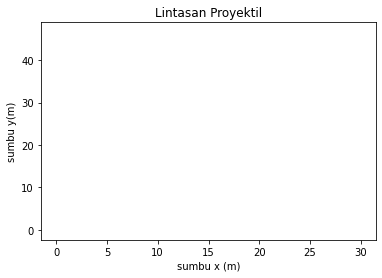

In [17]:
from matplotlib.animation import FuncAnimation
from celluloid import Camera

fig = plt.figure()
plt.title('Lintasan Proyektil')
plt.xlabel('sumbu x (m)')
plt.ylabel('sumbu y(m)')
sumbux = np.linspace(0, 30, 1000)
partikel_1 = shooting_euler(0.5)[1]
partikel_2 = shooting_euler(0.9)[1]
partikel_3 = shooting_euler(1.4)[1]
camera = Camera(fig)

for k in range(len(sumbux)):
    plt.plot(sumbux[0:k], partikel_1[0:k], color = 'red')
    plt.plot(sumbux[0:k], partikel_2[0:k], color = 'green')
    plt.plot(sumbux[0:k], partikel_3[0:k], color = 'blue')
    camera.snap()
animation = camera.animate()
animation.save('D:\parabola.mp4', writer = 'ffmpeg', fps=120, dpi=300)

In [10]:
len(sumbux)

1000

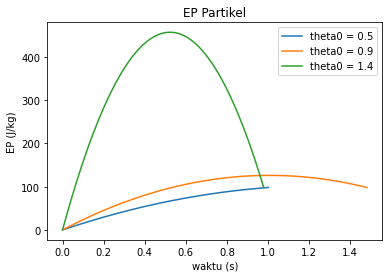

In [9]:
#Energi Potensial per satuan massa dari partikel dengan sudut awal 0.5, 0.9, dan 1.4 rad
EP_1 = 9.81*shooting_euler(0.5)[1]
EP_2 = 9.81*shooting_euler(0.9)[1]
EP_3 = 9.81*shooting_euler(1.4)[1]

t_maks_1 = 30/shooting_euler(0.5)[0]
t_1 = np.linspace(0, t_maks_1, 1000)
t_maks_2 = 30/shooting_euler(0.9)[0]
t_2 = np.linspace(0, t_maks_2, 1000)
t_maks_3 = 30/shooting_euler(1.4)[0]
t_3 = np.linspace(0, t_maks_3, 1000)

plt.plot(t_1, EP_1, label = 'theta0 = 0.5')
plt.plot(t_2, EP_2, label = 'theta0 = 0.9')
plt.plot(t_3, EP_3, label = 'theta0 = 1.4')
plt.title('EP Partikel')
plt.xlabel('waktu (s)')
plt.ylabel('EP (J/kg)')
plt.legend()
plt.show()

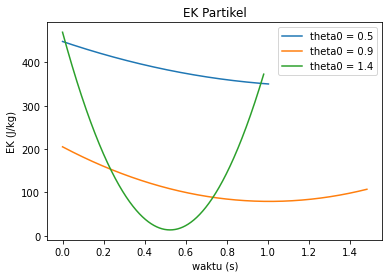

In [10]:
#Energi Kinetik per satuan massa dari partikel dengan sudut awal 0.5, 0.9, dan 1.4 rad
EK_1 = 0.5*shooting_euler(0.5)[2]*shooting_euler(0.5)[2]
EK_2 = 0.5*shooting_euler(0.9)[2]*shooting_euler(0.9)[2]
EK_3 = 0.5*shooting_euler(1.4)[2]*shooting_euler(1.4)[2]

plt.plot(t_1, EK_1, label = 'theta0 = 0.5')
plt.plot(t_2, EK_2, label = 'theta0 = 0.9')
plt.plot(t_3, EK_3, label = 'theta0 = 1.4')
plt.title('EK Partikel')
plt.xlabel('waktu (s)')
plt.ylabel('EK (J/kg)')
plt.legend()
plt.show()

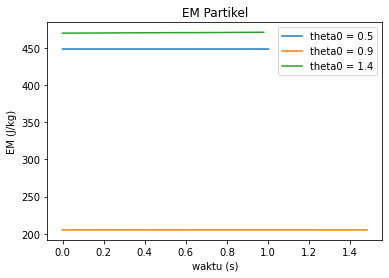

In [12]:
#Energi Mekanik per satuan massa dari partikel dengan sudut awal 0.5, 0.9, dan 1.4 rad
EM_1 = EK_1 + EP_1
EM_2 = EK_2 + EP_2
EM_3 = EK_3 + EP_3

plt.plot(t_1, EM_1, label = 'theta0 = 0.5')
plt.plot(t_2, EM_2, label = 'theta0 = 0.9')
plt.plot(t_3, EM_3, label = 'theta0 = 1.4')
plt.title('EM Partikel')
plt.xlabel('waktu (s)')
plt.ylabel('EM (J/kg)')
plt.legend()
plt.show()